## 2b. Evidence - Compliance - Velocity

Evidence collected in this section checks for velocity complience in the Gradient Climber Example.  The model is complient if the velocity never exceeds 0.05.

In [ ]:
# Define basic constants
NUM_TRIALS = 100

### Initialize MLTE Context

MLTE contains a global context that manages the currently active _session_. Initializing the context tells MLTE how to store all of the artifacts that it produces. This import will also set up global constants related to folders and model to use.

In [ ]:
# Sets up context for the model being used, sets up constants related to folders and model data to be used.
from demo.GradientClimber.session import *

In [1]:
import numpy as np
import gymnasium as gym

In [2]:
env = gym.make('MountainCar-v0',render_mode="rgb_array")
state, info = env.reset()

In [3]:
# Discretize the state space (position, velocity)
position_bins = np.linspace(-1.2, 0.6, 20)
velocity_bins = np.linspace(-0.07, 0.07, 20)

# Q-table initialization
q_table = np.load("mountain_car.npy")

# Discretize the continuous state (position and velocity)
def discretize_state(state):
    position, velocity = state
    position_idx = np.digitize(position, position_bins) - 1  # Position bin index
    velocity_idx = np.digitize(velocity, velocity_bins) - 1  # Velocity bin index
    return position_idx, velocity_idx

# Epsilon-greedy action selection
def choose_action(state):
    position_idx, velocity_idx = discretize_state(state)
    return np.argmax(q_table[position_idx, velocity_idx])

## Compliance

In [4]:
def evaluate_action(state,action):
    "Return 1 if this is the expected action, return 0 if it is the wrong move, and -1 as an error condition"
    position, velocity = state
    if (np.abs(velocity) >= 0.05):
        return np.bool(False)
    else:
        return np.bool(True)

In [ ]:
def test_velocity_compliance():
    done = False
    test_results = []
    states = [] 

    for i in range(NUM_TRIALS):
        state,info = env.reset()
        done = False
        actions=[]

        while not done:
            # Random action selection
            action = choose_action(state)
            
            # Take the action and get the next state, reward, done flag, and info
            next_state, reward, done, truncated, info = env.step(action)

            result = evaluate_action(state,action)
            if result==True:
                test_results.append(1)
            elif result==False:
                test_results.append(0)
            # Update the state for the next iteration
            state = next_state
            
        print(f"Completed trial {i}")

    return test_results


Completed trial 0
Completed trial 1
Completed trial 2
Completed trial 3
Completed trial 4
Completed trial 5
Completed trial 6
Completed trial 7
Completed trial 8
Completed trial 9
Completed trial 10
Completed trial 11
Completed trial 12
Completed trial 13
Completed trial 14


In [6]:
np.sum(np.array(test_results)==1)/len(test_results)

np.float64(0.9415496148618033)

In [7]:
test_results

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [8]:
vels = [ state[1] for state in states]

In [9]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
        0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
        0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
        0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
        0.875  , 0.90625, 0.9375 , 0.96875, 1.     ]),
 <BarContainer object of 32 artists>)

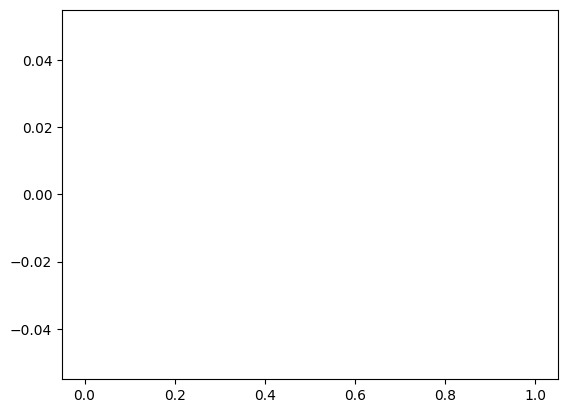

In [10]:
plt.hist(vels, bins=32)

In [11]:
np.__version__

'2.2.6'